2032995 Zimo Ma

The first data set(original_images) can be download: https://github.com/jg-fisher/dinoAI (correspond to first training)
The second data set(images), which is colleted by myself, can be download: https://github.com/JefferMa/Google-Dino-Game (second training)

To run the code or play the game, you need to have installed chromedriver.exe
(install in the same file, from http://chromedriver.chromium.org/downloads)

I also upload all data set and chromedriver to online disk, you can directly download them through the following link.
Link: https://pan.baidu.com/s/1wVt2ze3ygP9udptGFuUsXA
Password: gxdv

Libraries required to run the code:
python 3.6 (or advanced version)
opencv 3.4.2
keras 2.2.4
keras-applications 1.0.6
keras-preprocessing 1.0.5
h5py 2.8.0
numpy 1.15.4
mss 3.2.1

Image Size: (160, 540, 3)


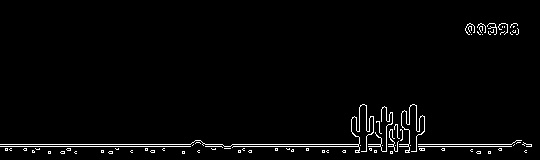

In [1]:
# This cell displays original data set, which is obtained from the website
import cv2
from PIL import Image

path = './original_images/frame_1155.jpg'
img = cv2.imread(path)

print("Image Size:", img.shape)
display(Image.open(path))

In [4]:
# CNN training model
# The images are the X training data, and the actions are the y labels
# The provided data set is so perfect that 'epochs' doesn't need to set many times
# The training result tend to stability with traning set = 100% and test set = 98.73%

import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
import cv2

# seed weights
np.random.seed(3)

X = []
Y = []
with open ('original_actions.csv', 'r') as f:
    for line in f:
        Y.append(line.rstrip())

all_images = []
img_num = 0
while img_num < len(Y): 
        img = cv2.imread(r'./original_images/frame_{0}.jpg'.format(img_num), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
        img = img[:, :, np.newaxis]
        all_images.append(img)
        img_num += 1
        
X = np.array(all_images)

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
# input image dimensions, should correspond to the data set
img_x, img_y = 80, 270 
input_shape = (img_x, img_y, 1)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 3
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

# modified CNN model
model = Sequential()
model.add(Conv2D(30, kernel_size=(3, 3), strides=(2, 2), activation='relu', input_shape=input_shape))
model.add(Conv2D(50, kernel_size=(2, 2), strides=(2, 2), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(100, kernel_size=(2, 2), strides=(2, 2), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(classifications, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=250, epochs=15, validation_data=(x_test, y_test))

# save weights post training
model.save('dino_ai_weights_post_train_1.h5')

Train on 1253 samples, validate on 314 samples
Epoch 1/15
1253/1253 [==============================] - 7s 6ms/step - loss: 0.8731 - acc: 0.6800 - val_loss: 0.3342 - val_acc: 0.8949
Epoch 2/15
1253/1253 [==============================] - 7s 5ms/step - loss: 0.2115 - acc: 0.9322 - val_loss: 0.1718 - val_acc: 0.9586
Epoch 3/15
1253/1253 [==============================] - 7s 5ms/step - loss: 0.0987 - acc: 0.9721 - val_loss: 0.1260 - val_acc: 0.9682
Epoch 4/15
1253/1253 [==============================] - 7s 5ms/step - loss: 0.0646 - acc: 0.9792 - val_loss: 0.0983 - val_acc: 0.9745
Epoch 5/15
1253/1253 [==============================] - 6s 5ms/step - loss: 0.0393 - acc: 0.9904 - val_loss: 0.0775 - val_acc: 0.9745
Epoch 6/15
1253/1253 [==============================] - 7s 5ms/step - loss: 0.0284 - acc: 0.9896 - val_loss: 0.0630 - val_acc: 0.9809
Epoch 7/15
1253/1253 [==============================] - 7s 6ms/step - loss: 0.0190 - acc: 0.9960 - val_loss: 0.0541 - val_acc: 0.9809
Epoch 8/15
1253

To run the cell, you must turn off your internet/wifi connection!

I also collect the data set by myself using opencv as the second training, because the size of the original data set is too limited.
Using keyboard to capture images frame by frame when playing the fame

In [23]:
import os
import cv2
from mss import mss
import numpy as np
import keyboard

def preprocessing(img):
    img = cv2.Canny(img, threshold1=100, threshold2=200)
    return img

# Captures dinosaur run game, designed for personal computer (adjust coordinates resepctively)
def capture_feed_start():

    sct = mss()
    coordinates = {
        'top': 495,
        'left': 600,
        'width': 1080,
        'height': 160,
    }

    with open('actions.csv', 'w') as csv:

        x = 0

        if not os.path.exists(r'./images'):
            os.mkdir(r'./images')

        while True:
            img = preprocessing(np.array(sct.grab(coordinates)))

            if keyboard.is_pressed('up arrow'): 
                cv2.imwrite('./images/frame_{0}.jpg'.format(x), img)
                csv.write('1\n')
                print('jump write')
                x += 1

            if keyboard.is_pressed('down arrow'):
                cv2.imwrite('./images/frame_{0}.jpg'.format(x), img)
                csv.write('2\n')
                print('down write')
                x += 1

            if keyboard.is_pressed('t'):
                cv2.imwrite('./images/frame_{0}.jpg'.format(x), img)
                csv.write('0\n')
                print('nothing')
                x += 1

            # break the video feed
            if keyboard.is_pressed('q'):
                print('end')
                csv.close()
                cv2.destroyAllWindows()
                break
    csv.close()       

In [24]:
from selenium import webdriver
import time
 
driver = webdriver.Chrome('chromedriver')

# internet connection must be off
driver.get('http://www.google.com/')
time.sleep(2)
page = driver.find_element_by_class_name('offline')
page.send_keys(u'\ue00d')

capture_feed_start()

nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
n

jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
no

jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothi

nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump 

jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
noth

jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
jump write
jump write


jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
jump write
jump write
jump write
jump write
jump write
jump write
jump write
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
j

Image Size: (160, 1080, 3)


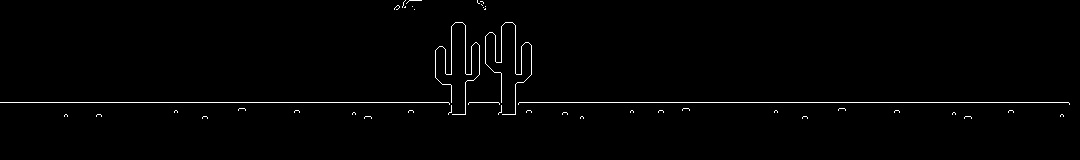

In [28]:
# This cell displays the second data set, which is obtained by myself
# Compared with the original image, it contains more valuable information without useless information

path = './images/frame_4558.jpg'
img = cv2.imread(path)

print("Image Size:", img.shape)
display(Image.open(path))

之用了 跳

In [29]:
# The images are the X training data, and the actions are the y labels
# Almost the same with the second cell, but use different data set
# epoch = (size of data) / (batch_size * literation)

import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
import cv2

# seed weights
np.random.seed(3)

X = []
Y = []

with open ('actions.csv', 'r') as f:
    for line in f:
        Y.append(line.rstrip())
        
all_images = []
img_num = 0
while img_num < len(Y): 
        img = cv2.imread(r'./images/frame_{0}.jpg'.format(img_num), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
        img = img[:, :, np.newaxis]
        all_images.append(img)
        img_num += 1
        
X = np.array(all_images)

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=5)

## input image dimensions
img_x, img_y = 80, 540
input_shape = (img_x, img_y, 1)

classifications = 2
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

# modified CNN model
model = Sequential()
model.add(Conv2D(30, kernel_size=(3, 3), strides=(2, 2), activation='relu', input_shape=input_shape))
model.add(Conv2D(50, kernel_size=(2, 2), strides=(2, 2), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(100, kernel_size=(2, 2), strides=(2, 2), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(classifications, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=300, epochs=22, validation_data=(x_test, y_test))

# save weights post training
model.save('dino_ai_weights_post_train_2.h5')

Train on 5079 samples, validate on 1270 samples
Epoch 1/22
5079/5079 [==============================] - 53s 11ms/step - loss: 0.6025 - acc: 0.8387 - val_loss: 0.1328 - val_acc: 0.9543
Epoch 2/22
5079/5079 [==============================] - 53s 10ms/step - loss: 0.1449 - acc: 0.9453 - val_loss: 0.1212 - val_acc: 0.9567
Epoch 3/22
5079/5079 [==============================] - 53s 10ms/step - loss: 0.1164 - acc: 0.9547 - val_loss: 0.0942 - val_acc: 0.9654
Epoch 4/22
5079/5079 [==============================] - 53s 10ms/step - loss: 0.0994 - acc: 0.9628 - val_loss: 0.0823 - val_acc: 0.9709
Epoch 5/22
5079/5079 [==============================] - 53s 10ms/step - loss: 0.0856 - acc: 0.9675 - val_loss: 0.0791 - val_acc: 0.9717
Epoch 6/22
5079/5079 [==============================] - 53s 11ms/step - loss: 0.0724 - acc: 0.9726 - val_loss: 0.0746 - val_acc: 0.9732
Epoch 7/22
5079/5079 [==============================] - 54s 11ms/step - loss: 0.0606 - acc: 0.9787 - val_loss: 0.0715 - val_acc: 0.9764


In [3]:
import time
from mss import mss
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
import cv2
from keras.models import load_model

model = load_model('dino_ai_weights_post_train_2.h5')

start = time.time()
def predict(game_element):

    # configuration for image capture
    sct = mss()

    coordinates = {
        'top': 495,
        'left': 600,
        'width': 1080,
        'height': 160,
    }

    # image capture
    img = np.array(sct.grab(coordinates))

    # edge detection, resizing to fit expected model input
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.Canny(img, threshold1=100, threshold2=200)
    img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
    img = img[np.newaxis, :, :, np.newaxis]
    img = np.array(img)

    # model prediction
    y_prob = model.predict(img)
    prediction = y_prob.argmax(axis=-1)

    if prediction == 1:
        # jump
        game_element.send_keys(u'\ue013')
        print('TO THE SKIES')
        time.sleep(.07)
    if prediction == 0:
        print('CHILL')
        # do nothing
        pass
    if prediction == 2:
        print('DOWN')
        # duck
        game_element.send_keys(u'\ue015')


In [4]:
# Finally, we play the game using training model
# Do not need to re-train the model, just diredctly load the model

from selenium import webdriver
import time
 
# change this to point to chromedriver location
driver = webdriver.Chrome('chromedriver')

# internet connection must be off
driver.get('http://www.google.com/')
time.sleep(2)

# main page to send key commands to
page = driver.find_element_by_class_name('offline')

# start game
page.send_keys(u'\ue00d')

# controls the dinosaur
while True:
    predict(page)

TO THE SKIES
TO THE SKIES
TO THE SKIES
TO THE SKIES
TO THE SKIES
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
TO THE SKIES
TO THE SKIES
CHILL
CHILL
CHILL
TO THE SKIES
TO THE SKIES
TO THE SKIES
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL


CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
TO THE SKIES
TO THE SKIES
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
TO THE SKIES
TO THE SKIES
TO THE SKIES
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
TO THE SKIES
TO THE SKIES
TO THE SKIES
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
TO THE SKIES
TO THE SKIES
TO THE SKIES
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL
CHILL

WebDriverException: Message: chrome not reachable
  (Session info: chrome=87.0.4280.141)
  (Driver info: chromedriver=2.44.609538 (b655c5a60b0b544917107a59d4153d4bf78e1b90),platform=Windows NT 10.0.19041 x86_64)
